In [1]:
! pip install -q kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
! kaggle datasets download zynicide/wine-reviews

 94% 48.0M/50.9M [00:00<00:00, 64.6MB/s]
100% 50.9M/50.9M [00:00<00:00, 65.4MB/s]


In [3]:
!unzip "/content/wine-reviews.zip" -d "/content/wine-reviews"

Archive:  /content/wine-reviews.zip
  inflating: /content/wine-reviews/winemag-data-130k-v2.csv  
  inflating: /content/wine-reviews/winemag-data-130k-v2.json  
  inflating: /content/wine-reviews/winemag-data_first150k.csv  


# Exploratory Data Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

%matplotlib inline


## Data Preparation

In [6]:
df = pd.read_csv("winemag-data_first150k.csv")

In [7]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [8]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [10]:
df.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


In [11]:
df1 = df.copy()

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [13]:
# proportion of price that in not null
prop_price = df1.price.count()/df1.shape[0]
prop_price

0.9092625720532698

In [14]:
# proportion of region that in not null
prop_reg1 = df1.region_1.count()/df1.shape[0]
prop_reg1

0.8339627641953223

In [15]:
df1 = df.dropna(subset=['price', 'country', 'province'], how ='any')
df1 = df1.drop(['Unnamed: 0', 'designation', 'region_2'], axis=1)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137230 entries, 0 to 150929
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      137230 non-null  object 
 1   description  137230 non-null  object 
 2   points       137230 non-null  int64  
 3   price        137230 non-null  float64
 4   province     137230 non-null  object 
 5   region_1     114393 non-null  object 
 6   variety      137230 non-null  object 
 7   winery       137230 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 9.4+ MB


In [17]:
df1.describe()

,points,price
count,137230.000000,137230.000000
mean,87.788035,33.132019
std,3.221572,36.323072
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


## Data Visualization and Analysis

### Where does the best wines come from?

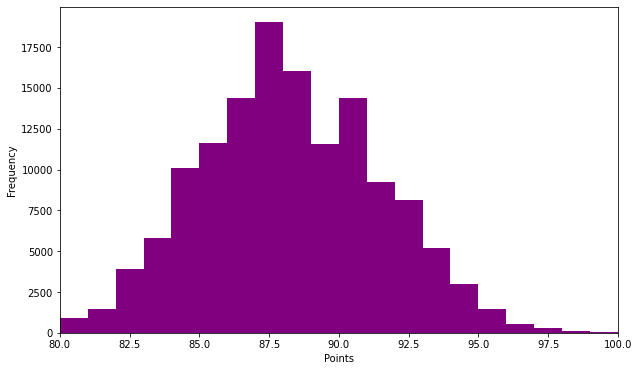

In [18]:
# plot the distribution of points
plt.figure(figsize=(10,6))
bin_edges = np.arange (80, df1['points'].max()+1, 1)
plt.hist(data = df1, x = 'points', bins = bin_edges, color = 'purple')
plt.xlim(80,100)
plt.xlabel('Points')
plt.ylabel('Frequency');

In [19]:
#Countries that produce most quantity of wine
wine_prod_country = df1.country.value_counts()[:15]
wine_prod_country

US              62139
Italy           18784
France          14785
Spain            8160
Chile            5766
Argentina        5587
Australia        4894
Portugal         4176
New Zealand      3070
Austria          2483
Germany          2347
South Africa     2237
Greece            872
Israel            610
Hungary           230
Name: country, dtype: int64

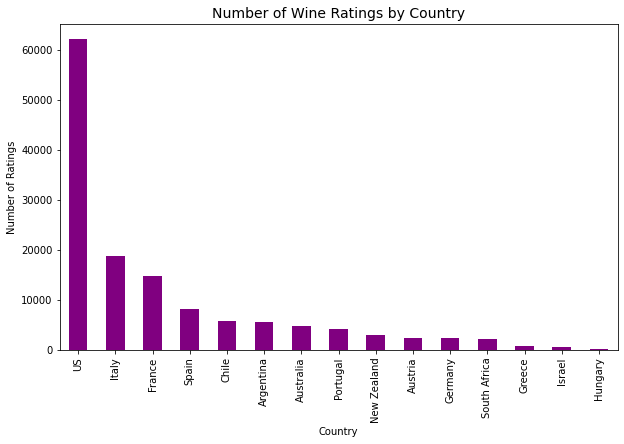

In [20]:
plt.figure(figsize=(10,6))
wine_prod_country.plot(kind='bar', color = 'purple')
plt.title('Number of Wine Ratings by Country', fontsize = 14)
plt.xlabel('Country')
plt.ylabel('Number of Ratings');

In [21]:
df1.country.value_counts()

US                        62139
Italy                     18784
France                    14785
Spain                      8160
Chile                      5766
Argentina                  5587
Australia                  4894
Portugal                   4176
New Zealand                3070
Austria                    2483
Germany                    2347
South Africa               2237
Greece                      872
Israel                      610
Hungary                     230
Canada                      194
Romania                     139
Uruguay                      85
Croatia                      83
Slovenia                     81
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       50
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
Luxembou

In [22]:
df2 = df1.groupby('country').agg('mean')
df2 = df2.sort_values(by='points', ascending=False)[:10]
df2

,points,price
country,,
England,92.750000,47.500000
Austria,89.190898,31.192106
Germany,88.610567,39.011078
France,88.603314,45.619885
Italy,88.445006,37.547913
Canada,88.221649,34.628866
Portugal,88.176724,26.332615
Slovenia,88.172840,28.061728
Morocco,88.166667,18.833333


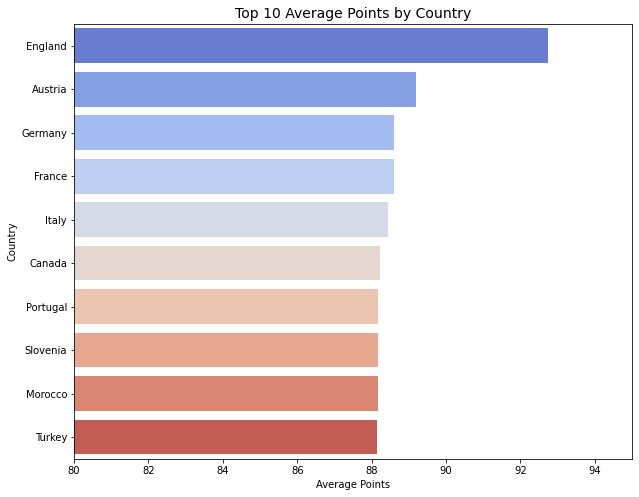

In [23]:
y_vals = df2.index.to_series()
x_vals = df2['points']

plt.figure(figsize=(10,8))
plt.xlim(80, 95)
sns.barplot(x=x_vals, y=y_vals, palette='coolwarm')
plt.title('Top 10 Average Points by Country', fontsize = 14)
plt.xlabel('Average Points')
plt.ylabel('Country');

The reason for countries like England producing the best quality wines could be attribiuted to the fact that only a few wines from england were reviewed and all of them having higer points skewed the mean.

In [24]:
high_scorers = df1[df1['points']>=95]
high_scorers

,country,description,points,price,province,region_1,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...
149175,France,Somehow Barton has overcome the heat of the 20...,95,115.0,Bordeaux,Saint-Julien,Bordeaux-style Red Blend,Château Léoville Barton
149176,France,"With its aromas of new wood, spice and black f...",95,150.0,Bordeaux,Saint-Estèphe,Bordeaux-style Red Blend,Château Cos d'Estournel
150562,Australia,"As unevolved as they are, the dense and multil...",96,185.0,South Australia,South Australia,Shiraz,Penfolds
150563,Australia,"Seamless luxury from stem to stern, this ‘baby...",95,70.0,South Australia,Barossa Valley,Shiraz,Penfolds


In [25]:
high_scorers.country.value_counts()

US              1324
France           484
Italy            362
Spain             87
Australia         82
Portugal          51
Austria           51
Germany           47
Argentina         20
Hungary            3
South Africa       2
Chile              1
Name: country, dtype: int64

In [42]:
# number of wines from each country in the dataset
df1.country.value_counts()

US                        62139
Italy                     18784
France                    14785
Spain                      8160
Chile                      5766
Argentina                  5587
Australia                  4894
Portugal                   4176
New Zealand                3070
Austria                    2483
Germany                    2347
South Africa               2237
Greece                      872
Israel                      610
Hungary                     230
Canada                      194
Romania                     139
Uruguay                      85
Croatia                      83
Slovenia                     81
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       50
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
Luxembou

It can be observed from the given table that the list of countries with the largest number of high scoring wines matches the general list of wines produced per country. 

The list of high scoring countries doesnt match the list obtained by taking the mean of the points by country.

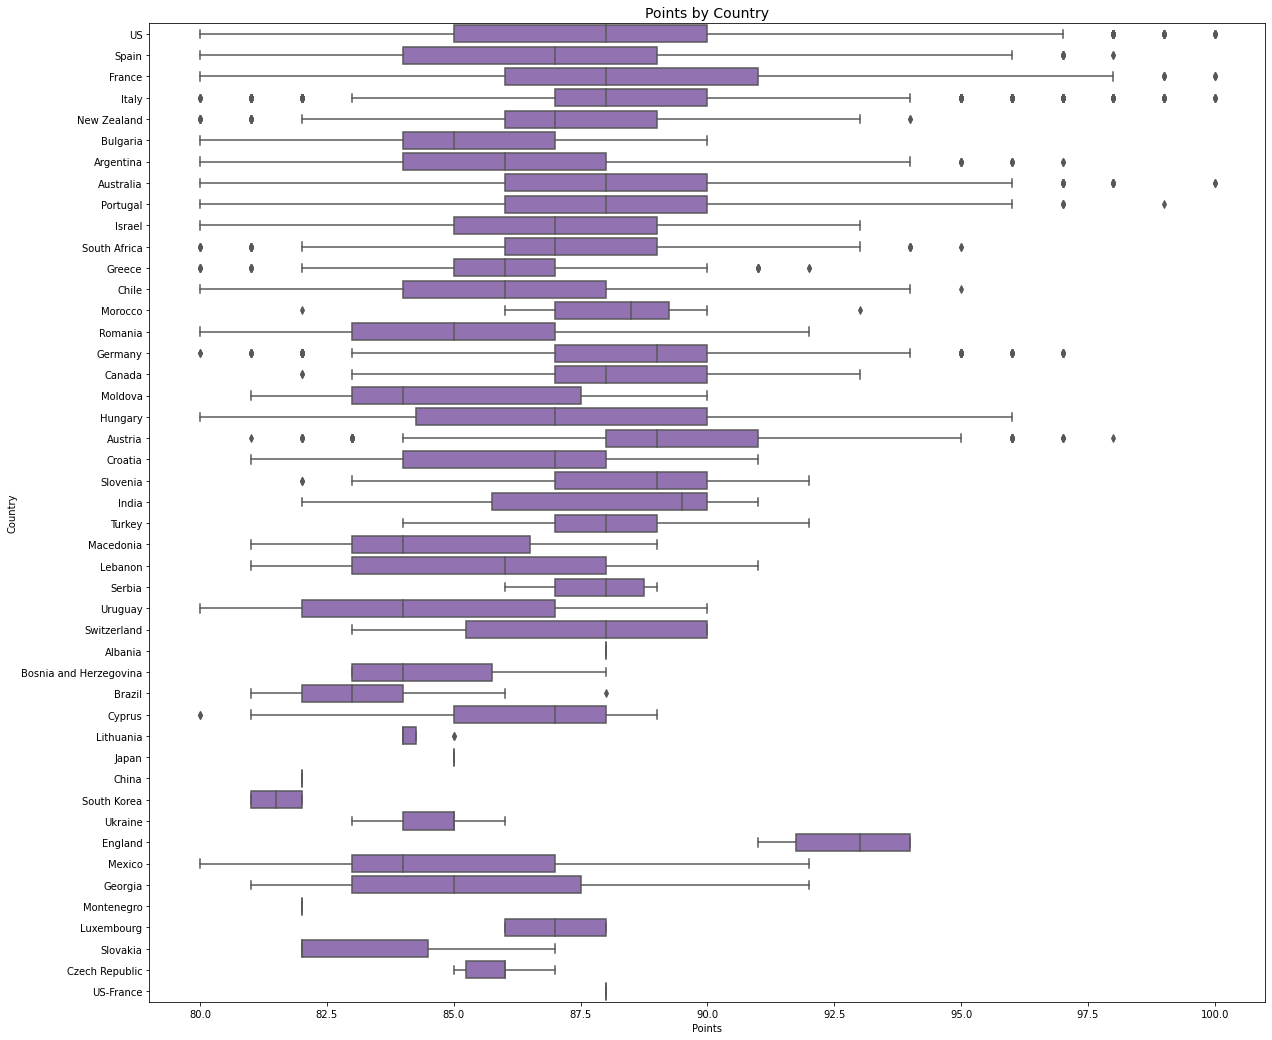

In [26]:
plt.figure(figsize=(20,18))
base_color = sns.color_palette()[4]
sns.boxplot(data = df1, x = 'points', y = 'country', color = base_color)
plt.title('Points by Country', fontsize = 14)
plt.xlabel('Points')
plt.ylabel('Country');

We can observe from the box-plot that although england had the highest mean points in all wine producing countries countries like USA, Italy, France and Australia have scored a perfect 100 points for their wines. 

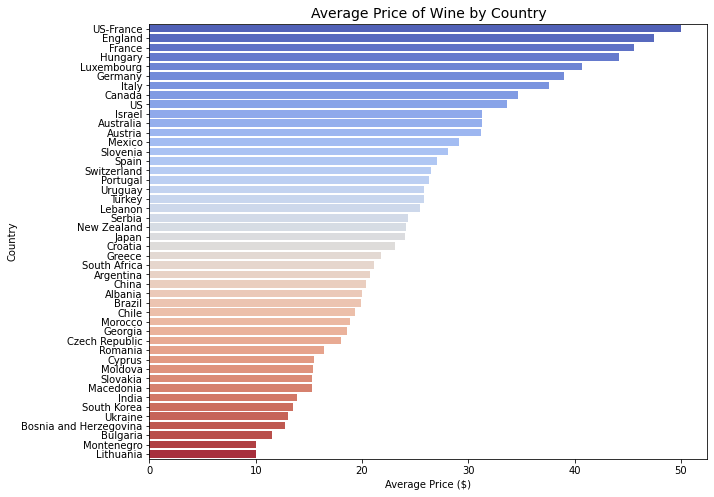

In [27]:
df3 = df1.groupby('country').agg('mean')
df3 = df3.sort_values(by='price', ascending=False)
y_val = df3.index.to_series()
x_val = df3['price']

plt.figure(figsize=(10,8))
sns.barplot(x=x_val, y=y_val, palette='coolwarm')
plt.title('Average Price of Wine by Country', fontsize = 14)
plt.xlabel('Average Price ($)')
plt.ylabel('Country');

### Price of wine vs Quality

Text(0, 0.5, 'Frequency')

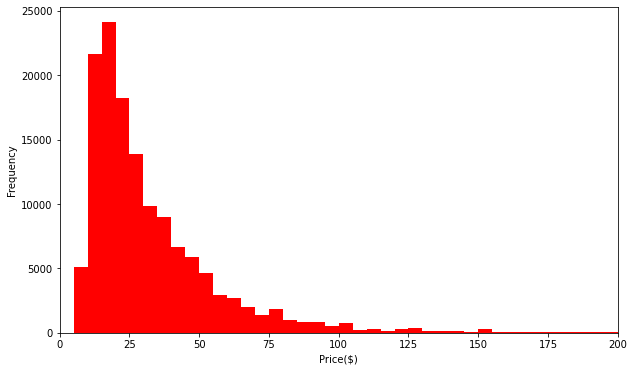

In [28]:
# plotting price distribution
plt.figure(figsize=(10,6))
bin_edges = np.arange (0, df1['price'].max()+5, 5)
plt.hist(data = df1, x = 'price', bins = bin_edges, color = 'red')
plt.xlim(0,200) # cut the x-axis at 200
plt.xlabel('Price($)')
plt.ylabel('Frequency')

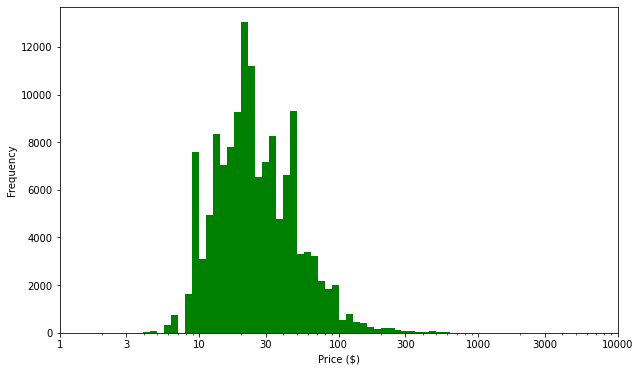

In [32]:
# plotting price distribution on a log scale
plt.figure(figsize=(10,6))
bin_edges = 10 ** np.arange(0.5, 3.5 + 0.05, 0.05)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]
plt.hist(data = df1, x = 'price', bins=bin_edges, color = 'green')
plt.xscale('log')
plt.xticks(ticks, ticks)
plt.xlabel('Price ($)')
plt.ylabel('Frequency');

This is aproximatly a log-normal or gausian ditribution. There is a jump around the 10 dollar, 20 dollar and 50 dollar mark. 

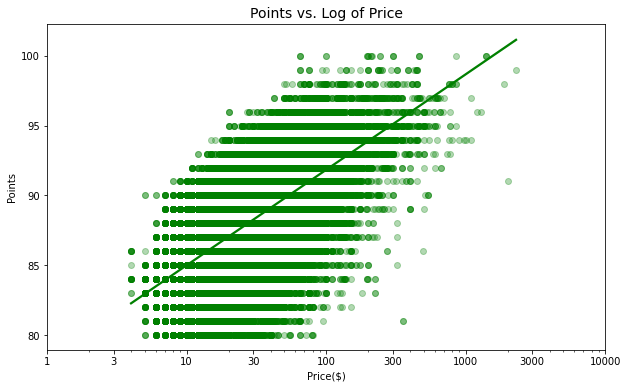

In [33]:
# plotting a scatter plot of relationship between points and price with a log transformation on the price axis
plt.figure(figsize=(10,6))
sns.regplot(x='price', y='points', data=df1, color = 'green', logx = True, scatter_kws={'alpha':0.3})
plt.title("Points vs. Log of Price", fontsize=14)
plt.xscale('log')
plt.xticks([1, 3, 10, 30, 100, 300, 1000, 3000, 10000], [1, 3, 10, 30, 100, 300, 1000, 3000, 10000])
plt.xlabel("Price($)")
plt.ylabel("Points");

### Are certain variety of wine better quality than the others?

In [29]:
# top 20 wines by count
df1.variety.value_counts()[:20]

Chardonnay                  13775
Pinot Noir                  13625
Cabernet Sauvignon          12671
Red Blend                    9377
Sauvignon Blanc              6054
Syrah                        5667
Riesling                     5212
Merlot                       4987
Bordeaux-style Red Blend     4545
Zinfandel                    3794
Malbec                       3085
Sangiovese                   2879
White Blend                  2554
Tempranillo                  2525
Rosé                         2461
Shiraz                       1945
Sparkling Blend              1820
Portuguese Red               1812
Nebbiolo                     1529
Rhône-style Red Blend        1455
Name: variety, dtype: int64

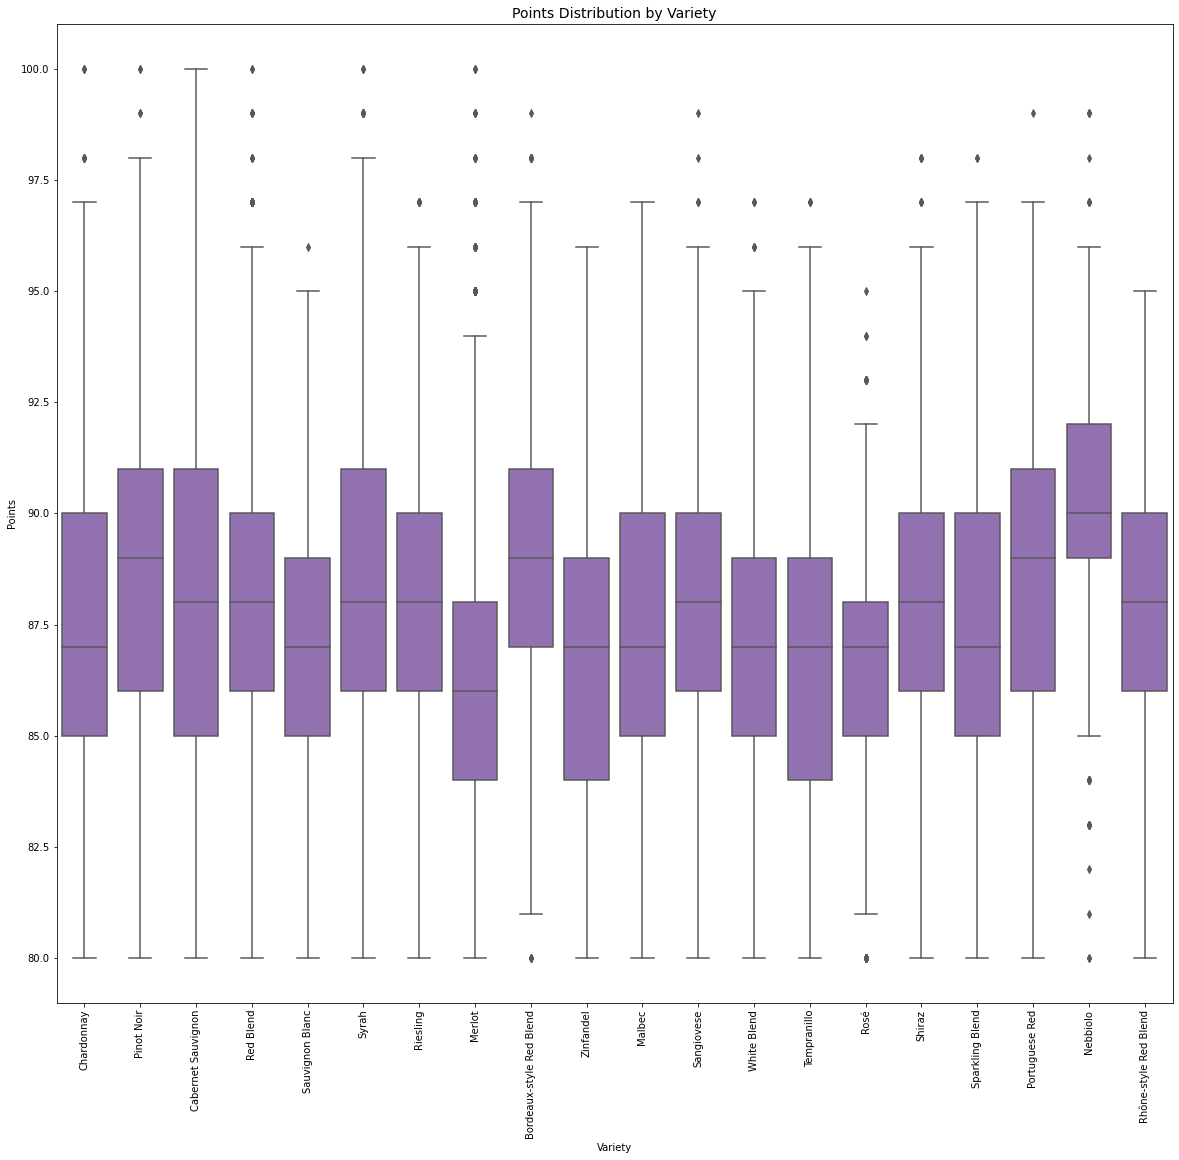

In [30]:
# boxplot of the top 20 most frequent wines in dataset by points scored
plt.figure(figsize=(20,18))
base_color = sns.color_palette()[4]
sns.boxplot(data = df1, x = 'variety', y = 'points', color = base_color, order = df1.variety.value_counts().iloc[:20].index)
plt.title('Points Distribution by Variety', fontsize = 14)
plt.xlabel('Variety')
plt.ylabel('Points')
plt.xticks(rotation=90);

### Best Wines in a certain price range

In [37]:
pd.options.display.max_colwidth = 500

In [35]:
cheap = df1[df1['price']<=15]

In [38]:
cheap.sort_values(by='points', ascending=False)[:10]

,country,description,points,price,province,region_1,variety,winery
140179,Spain,"This reserve-level P.X. sets the gold standard for excellence in sweet sherry. The lovely bouquet straddles the line between unadulterated sweetness and impeccable slyness. The flavors of fig, chocolate, caramel, browned butter and cinnamon are amazing. So chewy and thick, but balanced by firm acids. Brilliant.",94,15.0,Andalucia,Jerez,Pedro Ximénez,Sanchez Romate
84950,US,"A unique balance—9.8% alcohol and 2% residual sugar—with the subtle flavors of old vines a bonus. A gorgeous wine, tasted with escalar (white tuna) served as sushi. The buttery fish and the light, elegant Riesling are a stunning match. Neither overtakes the other.",93,15.0,Washington,Horse Heaven Hills,Riesling,OS Winery
35303,France,"This celebration of Tannat is a balanced while severe and structured wine. Plenty of juicy fruit is ready to come out from behind the dry, tannic structure. There is power here as well in this wine that is firm and needs to age. Drink from 2019.",93,15.0,Southwest France,Madiran,Tannat,Château d'Aydie
120170,US,"A unique balance—9.8% alcohol and 2% residual sugar—with the subtle flavors of old vines a bonus. A gorgeous wine, tasted with escalar (white tuna) served as sushi. The buttery fish and the light, elegant Riesling are a stunning match. Neither overtakes the other.",93,15.0,Washington,Horse Heaven Hills,Riesling,OS Winery
68126,South Africa,"This big boy greets us with his deep ruby/black cloak. Loaded with cassis from start to finish, there is tremendous fruit depth here and a full, supple mouthfeel. Reminiscent of one of the successful large-scale ‘97 California Cabernets. Has tannins to resolve, best held for a year or two.",93,15.0,Stellenbosch,NaN,Cabernet Sauvignon,Simonsig
19580,US,"A unique balance—9.8% alcohol and 2% residual sugar—with the subtle flavors of old vines a bonus. A gorgeous wine, tasted with escalar (white tuna) served as sushi. The buttery fish and the light, elegant Riesling are a stunning match. Neither overtakes the other.",93,15.0,Washington,Horse Heaven Hills,Riesling,OS Winery
130847,US,"This is a very sweet, unctuous dessert wine, with the flavor and texture of honey. Made from Viognier, it has decadent apricot, peach, tangerine and crème brûlée notes that combine in a dense, delicious mélange.",93,14.0,California,Russian River Valley,Viognier,Novy
23924,Portugal,"An elegant wine, its red fruits balanced with acidity and layers of wood aging. The style is serious, the ripe fruit restrained by the tannins. It will age well, giving an always structured, fine and stylish wine.",93,15.0,Douro,NaN,Portuguese Red,Quinta do Portal
83618,US,"The grapes used for this wine are from the original vines, planted almost 50 years ago by David Lett. Rich, sleek and textural, this thrilling effort sets a new standard for Oregon Pinot Gris. Grassy notes are married to lush citrus and apple fruit. The flavors go deep and long, the finish is immaculate and brings a palate-refreshing minerality.",93,15.0,Oregon,Dundee Hills,Pinot Gris,The Eyrie Vineyards
142923,US,"This may well be the best Riesling being made in Washington at the moment. Off-dry and very lightly carbonated, it explodes with a bouquet of flower flavors that hit you with lilac, citrus blossom, talcum powder and more. Lively and tight, the flavors gather strength and concentration as they move through a myriad of pretty fruits, finally resolving in a long, slightly honeyed finish. A masterful effort.",93,12.0,Washington,Columbia Valley (WA),Johannisberg Riesling,J. Bookwalter


In [39]:
low_mid = df1.query("price > 15 and price <=30")
low_mid.sort_values(by='points', ascending=False)[:10]

,country,description,points,price,province,region_1,variety,winery
81970,US,"This is as good as the best from California—textural, creamy, a delicious mix of lemon custard, meringue, caramel, papaya and toasted coconut. At one quarter the price of comparable bottles, this young wine just seduces from the instant it hits the tongue.",96,30.0,Washington,Columbia Valley (WA),Chardonnay,Efeste
65333,US,"What a roll Fess Parker Winery is on with their '08 Chardonnays. Not only great wine, but priced so well. This wine, sourced from Parker's U Block in this famous Santa Maria Valley vineyard, is as rich as any Chardonnay of the vintage—just massive in pineapple, pear and buttered toast flavors. Yet it's crisp and tart, clean and bracing in its minerality. Only 115 cases produced.",96,28.0,California,Santa Barbara County,Chardonnay,Fess Parker
10541,Italy,"This stunning Chianti Classico has an intense perfume of violet, rose and iris, accented with scents of truffle and forest berry. The wildly delicious palate presents a core of juicy cherry layered with sweet pipe tobacco, mint and spice, with a hint of well-integrated oak. It has great energy, with vibrant acidity and bracing but refined tannins. Drink 2016–2025.",96,27.0,Tuscany,Chianti Classico,Red Blend,Isole e Olena
56971,US,"Superb fruit highlights this tight, sculpted Syrah. It's extremely dense, with deep and intense raspberry and cassis fruit flavor, augmented with coffee grounds, smoke and iron filings. Complex, detailed, balanced and deep—what more can a wine give you? This is drinking very young and surely needs to be decanted. But already displaying amazing power.",96,20.0,Washington,Columbia Valley (WA),Syrah,Rulo
116693,US,"What a roll Fess Parker Winery is on with their '08 Chardonnays. Not only great wine, but priced so well. This wine, sourced from Parker's U Block in this famous Santa Maria Valley vineyard, is as rich as any Chardonnay of the vintage—just massive in pineapple, pear and buttered toast flavors. Yet it's crisp and tart, clean and bracing in its minerality. Only 115 cases produced.",96,28.0,California,Santa Barbara County,Chardonnay,Fess Parker
109231,US,"Superb fruit highlights this tight, sculpted Syrah. It's extremely dense, with deep and intense raspberry and cassis fruit flavor, augmented with coffee grounds, smoke and iron filings. Complex, detailed, balanced and deep—what more can a wine give you? This is drinking very young and surely needs to be decanted. But already displaying amazing power.",96,20.0,Washington,Columbia Valley (WA),Syrah,Rulo
134101,US,"Superb fruit highlights this tight, sculpted Syrah. It's extremely dense, with deep and intense raspberry and cassis fruit flavor, augmented with coffee grounds, smoke and iron filings. Complex, detailed, balanced and deep—what more can a wine give you? This is drinking very young and surely needs to be decanted. But already displaying amazing power.",96,20.0,Washington,Columbia Valley (WA),Syrah,Rulo
121313,US,"What a roll Fess Parker Winery is on with their '08 Chardonnays. Not only great wine, but priced so well. This wine, sourced from Parker's U Block in this famous Santa Maria Valley vineyard, is as rich as any Chardonnay of the vintage—just massive in pineapple, pear and buttered toast flavors. Yet it's crisp and tart, clean and bracing in its minerality. Only 115 cases produced.",96,28.0,California,Santa Barbara County,Chardonnay,Fess Parker
134113,US,"Massive, opulent, oozing in pineapple créme brulée, honey, buttered toast and cinnamon spice flavors. Totally decadent, and fortunately set off with brisk, citrusy acidity. Calling all lobsters, and don't forget the drawn butter. Sheer hedonism in a glass, at a fantastic price.",95,26.0,California,Sta. Rita Hills,Chardonnay,Melville
34205,France,"Pure Petit Manseng harvested in November has given the essence of Jurançon. Superbly ripe, botrytised fruit is perfectly balanced with layers of freshness, apricot juice and a crisp, nervy tex

In [40]:
mid = df1.query("price > 30 and price <=50")
mid.sort_values(by='points', ascending=False)[:10]

,country,description,points,price,province,region_1,variety,winery
34924,US,"A stunning Pirouette—63% Cabernet Sauvignon, 22% Merlot, 9% Cab Franc and 6% Petit Verdot. Full and magnificently rich, it is loaded with dense and thrilling fruit flavors of black cherry and cassis. A streak of iron and a hint of citrus keep the wine evolving through a long, beautifully balanced finish. Retasted after being open for 24 hours, the wine was as fresh and thrilling as on the first day.",98,50.0,Washington,Columbia Valley (WA),Bordeaux-style Red Blend,Pirouette
94921,US,"From the wildest, most remote and exotic stretch of the Sonoma Coast: you can taste the salt of the sea in this wine, as you can in a Manzanilla Sherry. It gives a tang to the lemondrop, pear and honeysuckle flavors, with their lick of cold granite. So pure and vibrant, so savory, so compelling. Grows more fascinating with every minute in the glass.",97,42.0,California,Sonoma Coast,Chardonnay,Failla
70231,US,"From the wildest, most remote and exotic stretch of the Sonoma Coast: you can taste the salt of the sea in this wine, as you can in a Manzanilla Sherry. It gives a tang to the lemondrop, pear and honeysuckle flavors, with their lick of cold granite. So pure and vibrant, so savory, so compelling. Grows more fascinating with every minute in the glass.",97,42.0,California,Sonoma Coast,Chardonnay,Failla
98494,US,"This distinctive Pinot Noir's source is a tiny vineyard in cool Green Valley; the winegrower is James MacPhail, whose own MacPhail Pinot Noirs are so good. The wine itself is totally dry and silky and firm in acidity, yet soft in fine tannins. You might call it noble. It's eruptive in cherries, sweet smoky bacon, raspberry granola and oaky sandalwood. Gorgeous, seductive and brilliant, a truly great Pinot Noir that's impeccable now.",97,50.0,California,Green Valley,Pinot Noir,Sequana
131161,US,"From the wildest, most remote and exotic stretch of the Sonoma Coast: you can taste the salt of the sea in this wine, as you can in a Manzanilla Sherry. It gives a tang to the lemondrop, pear and honeysuckle flavors, with their lick of cold granite. So pure and vibrant, so savory, so compelling. Grows more fascinating with every minute in the glass.",97,42.0,California,Sonoma Coast,Chardonnay,Failla
127493,US,"A monumental Cabernet that succeeds on every level. It's deep, dark and ultrarich, showing massive blackberries, black currants, dark chocolate, violets, minerals and a touch of sweet, smoky oak. Beyond the flavors is the dramatic structure, with fabulously ripe, dense tannins and a bone-dry, long finish. Surely a tremendous wine capable of long-term aging. Try 2012–2018, at least.",97,50.0,California,Oak Knoll District,Cabernet Sauvignon,Trefethen
42803,US,"This wine shows real first-growth quality in its intensity and concentration, with orange nectar, golden mango, pear, peach pie, buttercream, vanilla, buttered toast and spice flavors. The balance is exquisite, and the way the acids dance along the palate make the wine clean and lively.",97,50.0,California,Russian River Valley,Chardonnay,Williams Selyem
121504,US,"This distinctive Pinot Noir's source is a tiny vineyard in cool Green Valley; the winegrower is James MacPhail, whose own MacPhail Pinot Noirs are so good. The wine itself is totally dry and silky and firm in acidity, yet soft in fine tannins. You might call it noble. It's eruptive in cherries, sweet smoky bacon, raspberry granola and oaky sandalwood. Gorgeous, seductive and brilliant, a truly great Pinot Noir that's impeccable now.",97,50.0,California,Green Valley,Pinot Noir,Sequana
55504,US,"This distinctive Pinot Noir's source is a tiny vineyard in cool Green Valley; the winegrower is James MacPhail, whose own MacPhail Pinot Noirs are so good. The wine itself is totally dry and silky and firm in acidity, yet soft in fine tannins. You might call it noble. It's eruptive in cherries, sweet smoky bacon, raspberry granola and oaky sandalwood. Gorgeous, s

In [41]:
high = df1.query("price > 50")
high.sort_values(by='points', ascending=False)[:20]

,country,description,points,price,province,region_1,variety,winery
84034,US,"In a stunning lineup of Cayuse Syrahs, the En Chamberlin wins by a nose. It's smooth and silky, with a tongue-bending blend of flavors that include blood and iron, umami and salt, at first overtaking the pure fruit, but adding tremendous depth and power. The endless finish unfolds into a wine with exotic spices and complex layering.",100,65.0,Oregon,Walla Walla Valley (OR),Syrah,Cayuse
122767,US,"A spectacular Pinot Noir, but a very young one, and extremely dry. It's a wine of great structure, with rich acids and tannins framing extraordinarily complex flavors of grilled cherries, strawberries and raspberries, with complicating notes of cola, pomegranates, orange zest, anise, dusty Asian spices and smoky sandalwood. A truly great Pinot Noir from a great vintage that needs time in the bottle to express itself. The vineyard, which is owned by the winery, is only 19 acres, planted to an...",100,100.0,California,Russian River Valley,Pinot Noir,Williams Selyem
143522,US,"Impossibly aromatic. Hard to imagine greater claret perfume. Shows the most refined mingling of smoky oak, cassis, cherries, roasted coconut macaroon, cocoa puff and spice scents. Absolutely first rate, as good as anything Napa Valley produces. Compellingly, addictively delicious, but so dry and voluptuous. Classic wine, with perfect alignment of fruit, acids, tannins, oak, alcohol, the works. The grapes are from Sloan's portion of the Sacrashe Vineyard, high above the Silverado Trail in the...",100,245.0,California,Rutherford,Cabernet Blend,Sloan
78004,Italy,"This small, family-run estate in the heart of Bolgheri has delivered a wine so beautiful and elegant, it is catapulted to the level of landmark vintages of its celebrated neighbors, Sassicaia and Ornellaia. Inky concentration sets the stage for generous, but perfectly integrated, aromas of spice, chocolate and dark fruit. There's firm roundness in the mouth, followed by unforgettable persistence. Hold this wine 15 years or more.",100,195.0,Tuscany,Bolgheri Superiore,Red Blend,Giovanni Chiappini
51886,France,"A wine that has created its own universe. It has a unique, special softness that allies with the total purity that comes from a small, enclosed single vineyard. The fruit is almost irrelevant here, because it comes as part of a much deeper complexity. This is a great wine, at the summit of Champagne, a sublime, unforgettable experience.",100,1400.0,Champagne,Champagne,Chardonnay,Krug
111087,Italy,"Thick as molasses and dark as caramelized brown sugar, the wine oozes out of the bottle releasing concentrated aromas of butterscotch, toffee, honey, licorice, coffee, resin and maple syrup. Grapes from the Montepulciano area are dried in a ventilated room and the wine ages over 10 years in tiny oak barrels resulting in thick, dark concentration. Don't pair it with food: Vin Santo as good as this deserves to be enjoyed alone, as a so-called “meditation wine.”",100,210.0,Tuscany,Vin Santo di Montepulciano,Prugnolo Gentile,Avignonesi
41521,Italy,"A perfect wine from a classic vintage, the 2007 Masseto (100% Merlot from a 17-acre vineyard of the same name) opens with an unabashedly opulent bouquet of delicious blackberry, cherry, chocolate, vanilla, exotic spice and cinnamon. Masseto excels both in terms of quality of fruit and winemaking and delivers plush, velvety tannins and an extra long, supple finish. It will make a special and valuable collection to your cellar.",100,460.0,Tuscany,Toscana,Merlot,Tenuta dell'Ornellaia
137099,US,"Tasted in a flight of great and famous Napa wines, this Cardinale stood at the head of the pack. Starts with a very fine nose of cedar, cassis, ripe blackberries and violets, then turns dramatic and refined in the mouth. Shows vast depth and length, with the finish a full minute of sweet fruits and spices. Marvelous tannins, so plush and elegant, so powerful yet refined. The grapes hail from Mt. Veeder, Howel